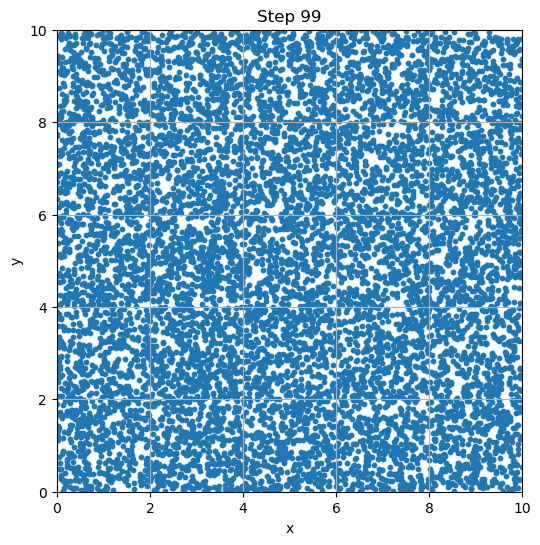

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
num_particles = 10000       # Number of particles
box_size = 10.0           # Size of the simulation box (LxL)
cell_size = 1.0           # Size of collision cells
time_step = 0.1           # Time step
num_steps = 100           # Number of simulation steps
thermal_velocity = 1.0    # Initial velocity distribution standard deviation
collision_angle = np.pi/2 # Rotation angle for collision step

# Initialize particle positions and velocities
positions = np.random.rand(num_particles, 2) * box_size
velocities = np.random.normal(0, thermal_velocity, (num_particles, 2))

# Function for periodic boundary conditions
def apply_periodic_boundary(positions, box_size):
    return positions % box_size

# Function for collision step
def collision_step(positions, velocities, cell_size, collision_angle):
    num_cells = int(box_size / cell_size)
    cell_indices = (positions // cell_size).astype(int)
    cell_velocities = {}
    
    # Group velocities by cell
    for i, cell in enumerate(cell_indices):
        cell_key = tuple(cell)
        if cell_key not in cell_velocities:
            cell_velocities[cell_key] = []
        cell_velocities[cell_key].append(i)
    
    # Perform collision within each cell
    for cell, indices in cell_velocities.items():
        if len(indices) > 1:  # Collision requires at least two particles
            center_of_mass_velocity = velocities[indices].mean(axis=0)
            relative_velocities = velocities[indices] - center_of_mass_velocity
            
            # Rotate relative velocities
            rotation_matrix = np.array([
                [np.cos(collision_angle), -np.sin(collision_angle)],
                [np.sin(collision_angle), np.cos(collision_angle)]
            ])
            rotated_velocities = relative_velocities @ rotation_matrix.T
            velocities[indices] = center_of_mass_velocity + rotated_velocities
    
    return velocities

# Prepare to save positions for animation
positions_over_time = [positions.copy()]

# Simulation loop
for step in range(num_steps):
    # Streaming step
    positions += velocities * time_step
    positions = apply_periodic_boundary(positions, box_size)
    
    # Collision step
    velocities = collision_step(positions, velocities, cell_size, collision_angle)
    
    # Save positions for animation
    positions_over_time.append(positions.copy())

# Animation function
def update(frame):
    plt.clf()
    plt.scatter(positions_over_time[frame][:, 0], positions_over_time[frame][:, 1], s=10)
    plt.xlim(0, box_size)
    plt.ylim(0, box_size)
    plt.title(f"Step {frame}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)

# Create the animation
fig = plt.figure(figsize=(6, 6))
ani = FuncAnimation(fig, update, frames=num_steps, interval=50)

# Save the animation as a GIF
ani.save("mpcd_simulation.gif", writer=PillowWriter(fps=20))
plt.show()

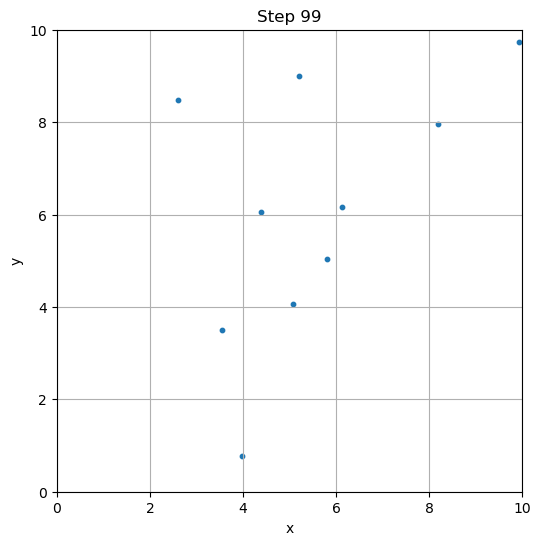

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
num_particles = 10       # Number of particles
box_size = 10.0             # Size of the simulation box (LxL)
cell_size = 1.0             # Size of collision cells
time_step = 0.1             # Time step
num_steps = 100             # Number of simulation steps
thermal_velocity = 1.0      # Initial velocity distribution standard deviation
collision_angle = np.pi / 2 # Rotation angle for collision step

# Initialize particle positions and velocities
positions = np.random.rand(num_particles, 2) * box_size
velocities = np.random.normal(0, thermal_velocity, (num_particles, 2))

# Function for solid wall boundary conditions
def apply_solid_wall_boundary(positions, velocities, box_size):
    for i in range(len(positions)):
        for dim in range(2):  # Check x and y dimensions
            if positions[i, dim] < 0:  # Left or bottom wall
                positions[i, dim] = -positions[i, dim]  # Reflect position
                velocities[i, dim] = -velocities[i, dim]  # Reverse velocity
            elif positions[i, dim] > box_size:  # Right or top wall
                positions[i, dim] = 2 * box_size - positions[i, dim]  # Reflect position
                velocities[i, dim] = -velocities[i, dim]  # Reverse velocity

# Function for collision step
def collision_step(positions, velocities, cell_size, collision_angle):
    num_cells = int(box_size / cell_size)
    cell_indices = (positions // cell_size).astype(int)
    cell_velocities = {}
    
    # Group velocities by cell
    for i, cell in enumerate(cell_indices):
        cell_key = tuple(cell)
        if cell_key not in cell_velocities:
            cell_velocities[cell_key] = []
        cell_velocities[cell_key].append(i)
    
    # Perform collision within each cell
    for cell, indices in cell_velocities.items():
        if len(indices) > 1:  # Collision requires at least two particles
            center_of_mass_velocity = velocities[indices].mean(axis=0)
            relative_velocities = velocities[indices] - center_of_mass_velocity
            
            # Rotate relative velocities
            rotation_matrix = np.array([
                [np.cos(collision_angle), -np.sin(collision_angle)],
                [np.sin(collision_angle), np.cos(collision_angle)]
            ])
            rotated_velocities = relative_velocities @ rotation_matrix.T
            velocities[indices] = center_of_mass_velocity + rotated_velocities
    
    return velocities

# Prepare to save positions for animation
positions_over_time = [positions.copy()]

# Simulation loop
for step in range(num_steps):
    # Streaming step
    positions += velocities * time_step
    
    # Apply solid wall boundary conditions
    apply_solid_wall_boundary(positions, velocities, box_size)
    
    # Collision step
    velocities = collision_step(positions, velocities, cell_size, collision_angle)
    
    # Save positions for animation
    positions_over_time.append(positions.copy())

# Animation function
def update(frame):
    plt.clf()
    plt.scatter(positions_over_time[frame][:, 0], positions_over_time[frame][:, 1], s=10)
    plt.xlim(0, box_size)
    plt.ylim(0, box_size)
    plt.title(f"Step {frame}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)

# Create the animation
fig = plt.figure(figsize=(6, 6))
ani = FuncAnimation(fig, update, frames=num_steps, interval=50)

# Save the animation as a GIF
ani.save("mpcd_simulation_solid_walls.gif", writer=PillowWriter(fps=20))
plt.show()